In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, ks_2samp
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import rc, cm
from svg2emf import svg2emf
rc('axes',linewidth=1.4)

In [2]:
from Constants import *
import Preprocessing as pp
import Plot

In [3]:
from importlib import reload 

In [4]:
RNAME = 'MT3'

# Pulling/PMF

In [5]:
reload(pp)

<module 'Preprocessing' from 'C:\\Users\\sfranco\\Documents\\PhD\\Data\\ThiolScreening\\Library\\S36\\Preprocessing.py'>

In [6]:
MT3_PMF = pp.Catecholamine_PMF(RNAME)
MT3_PMF.data.dgs = MT3_PMF.data.dgs.apply(lambda x: -1*np.array(x))
MT3_PMF.data = pp.rank_metric('dg', MT3_PMF.data)
MT3_PMF.data.dgs = MT3_PMF.data.dgs.apply(lambda x: -1*np.array(x))

ALA-ALA
ALA-GLN
ALA-GLY
ALA-ILE
ALA-LEU
ALA-PHE
ALA-PRO
ALA-SER
ALA-TRP
ALA-TYR
GLN-ALA
GLN-GLN
GLN-GLY
GLN-ILE
GLN-LEU
GLN-PHE
GLN-PRO
GLN-SER
GLN-TRP
GLN-TYR
GLY-ALA
GLY-GLN
GLY-GLY
GLY-ILE
GLY-LEU
GLY-PHE
GLY-PRO
GLY-SER
GLY-TRP
GLY-TYR
ILE-ALA
ILE-GLN
ILE-GLY
ILE-ILE
ILE-LEU
ILE-PHE
ILE-PRO
ILE-SER
ILE-TRP
ILE-TYR
LEU-ALA
LEU-GLN
LEU-GLY
LEU-ILE
LEU-LEU
LEU-PHE
LEU-PRO
LEU-SER
LEU-TRP
LEU-TYR
PHE-ALA
PHE-GLN
PHE-GLY
PHE-ILE
PHE-LEU
PHE-PHE
PHE-PRO
PHE-SER
PHE-TRP
PHE-TYR
PRO-ALA
PRO-GLN
PRO-GLY
PRO-ILE
PRO-LEU
PRO-PHE
PRO-PRO
PRO-SER
PRO-TRP
PRO-TYR
SER-ALA
SER-GLN
SER-GLY
SER-ILE
SER-LEU
SER-PHE
SER-PRO
SER-SER
SER-TRP
SER-TYR
TRP-ALA
TRP-GLN
TRP-GLY
TRP-ILE
TRP-LEU
TRP-PHE
TRP-PRO
TRP-SER
TRP-TRP
TRP-TYR
TYR-ALA
TYR-GLN
TYR-GLY
TYR-ILE
TYR-LEU
TYR-PHE
TYR-PRO
TYR-SER
TYR-TRP
TYR-TYR


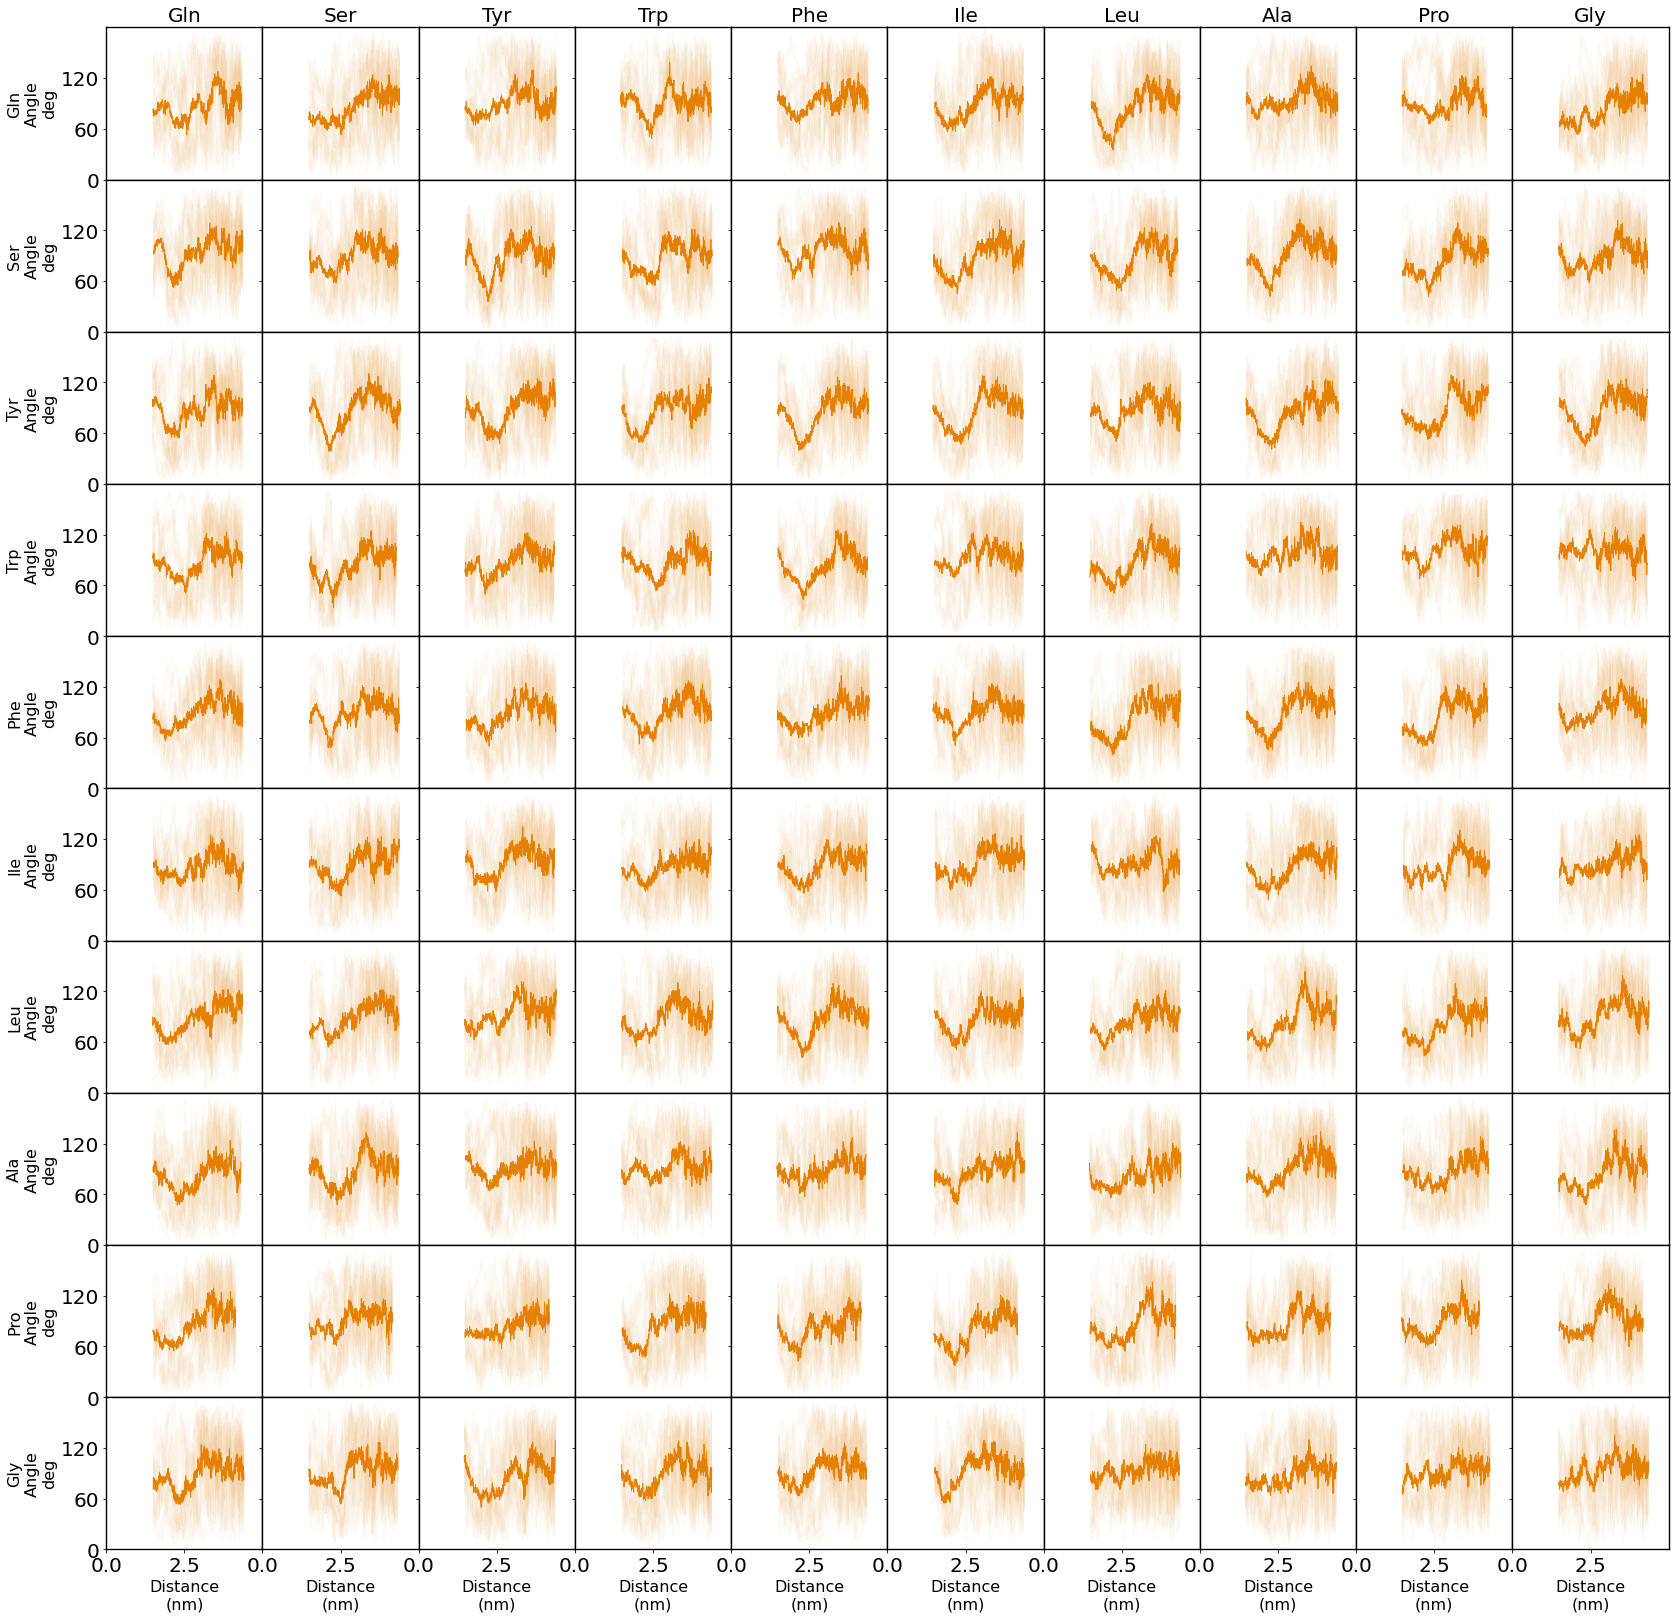

In [7]:
Plot.plot_all_angs(MT3_PMF)

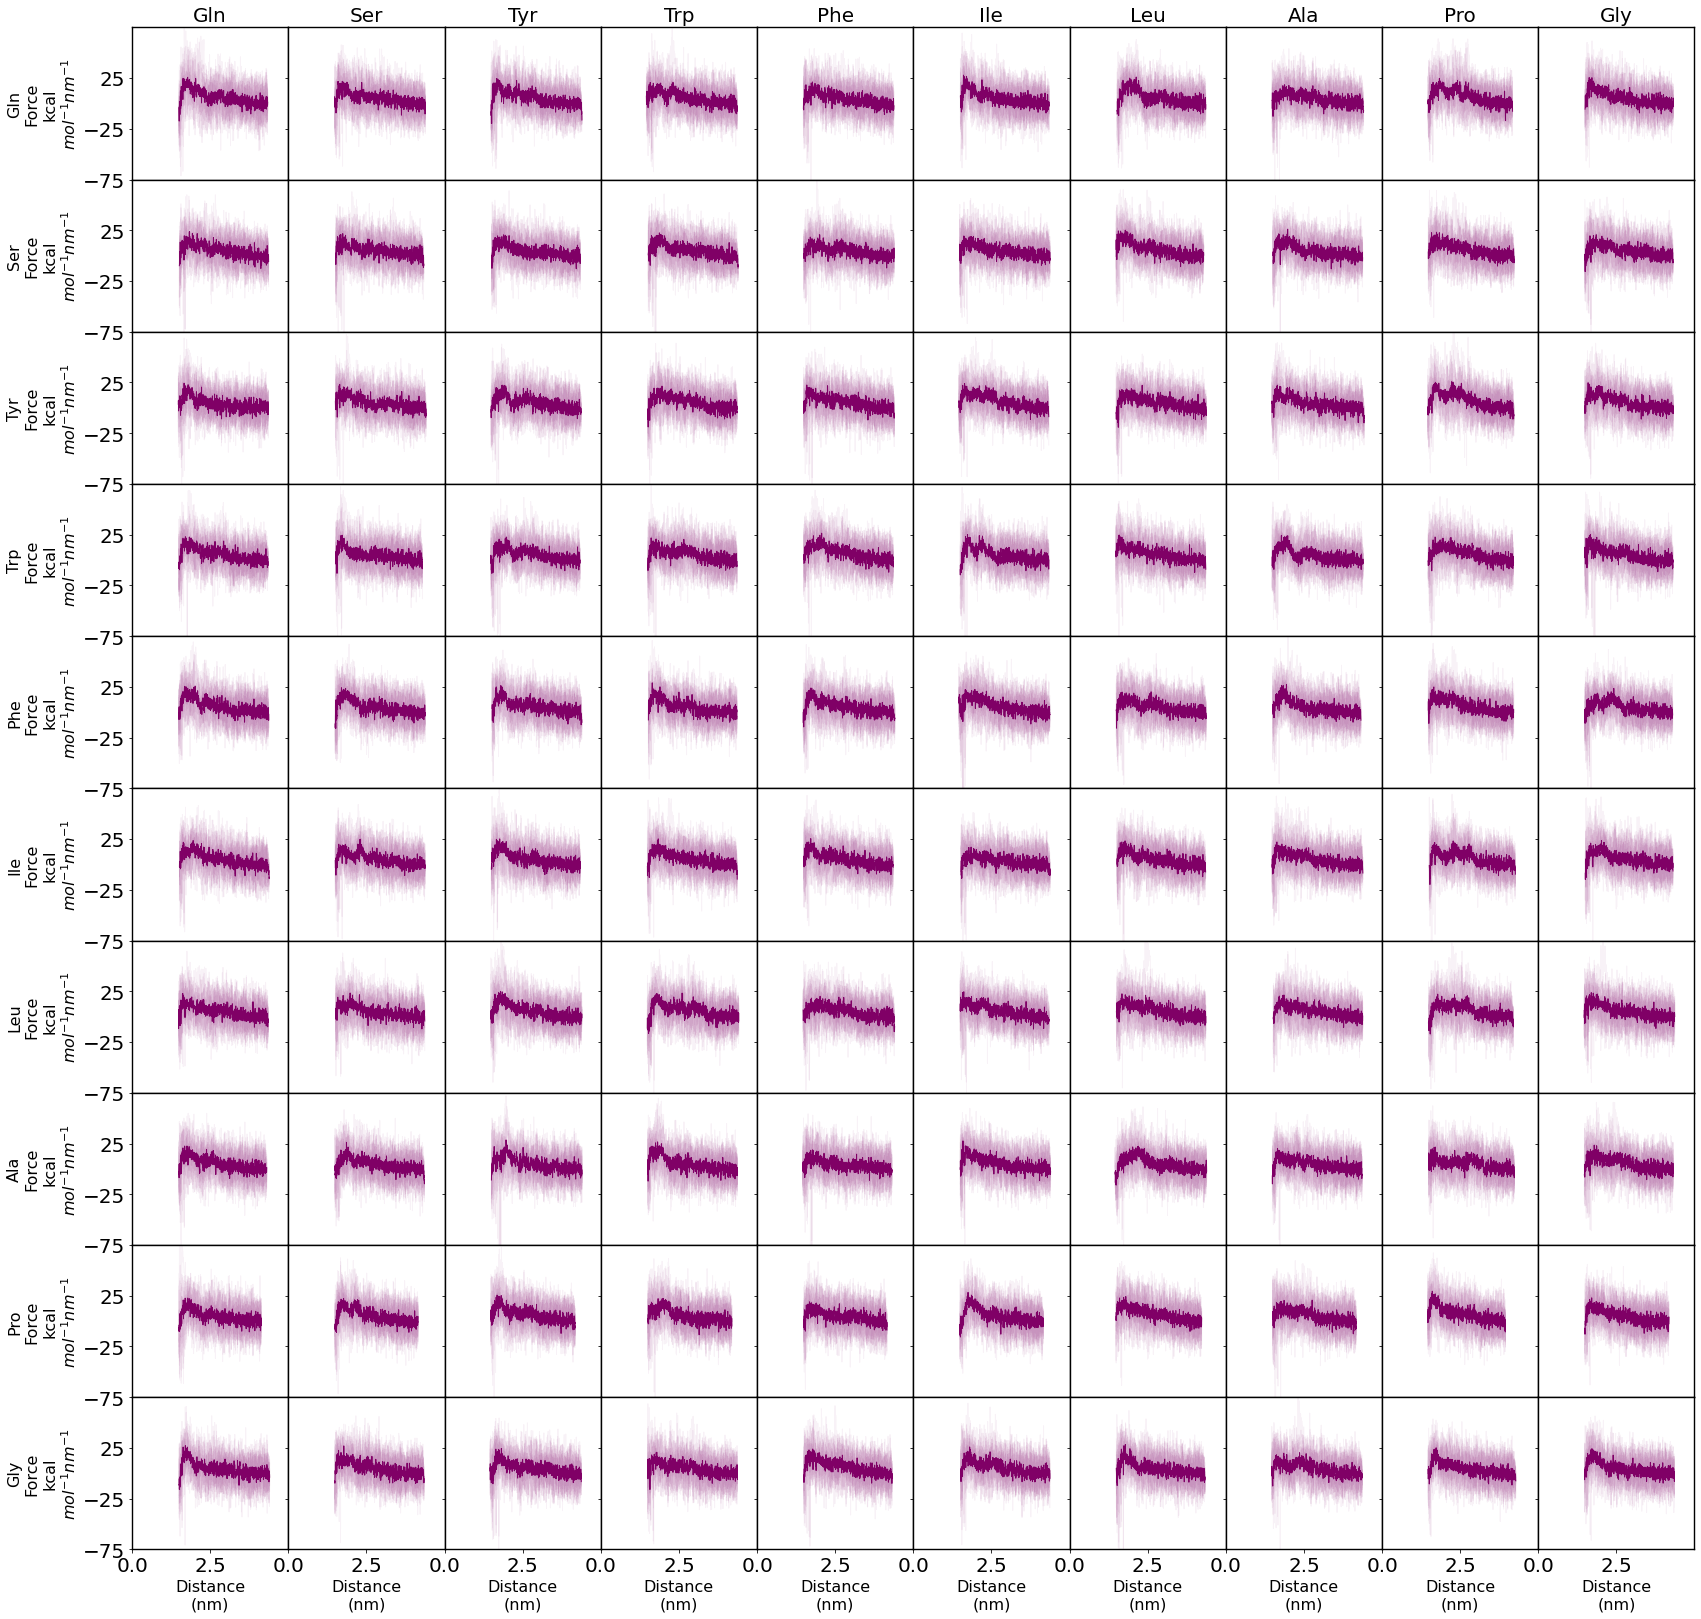

In [8]:
Plot.plot_all_forces(MT3_PMF)

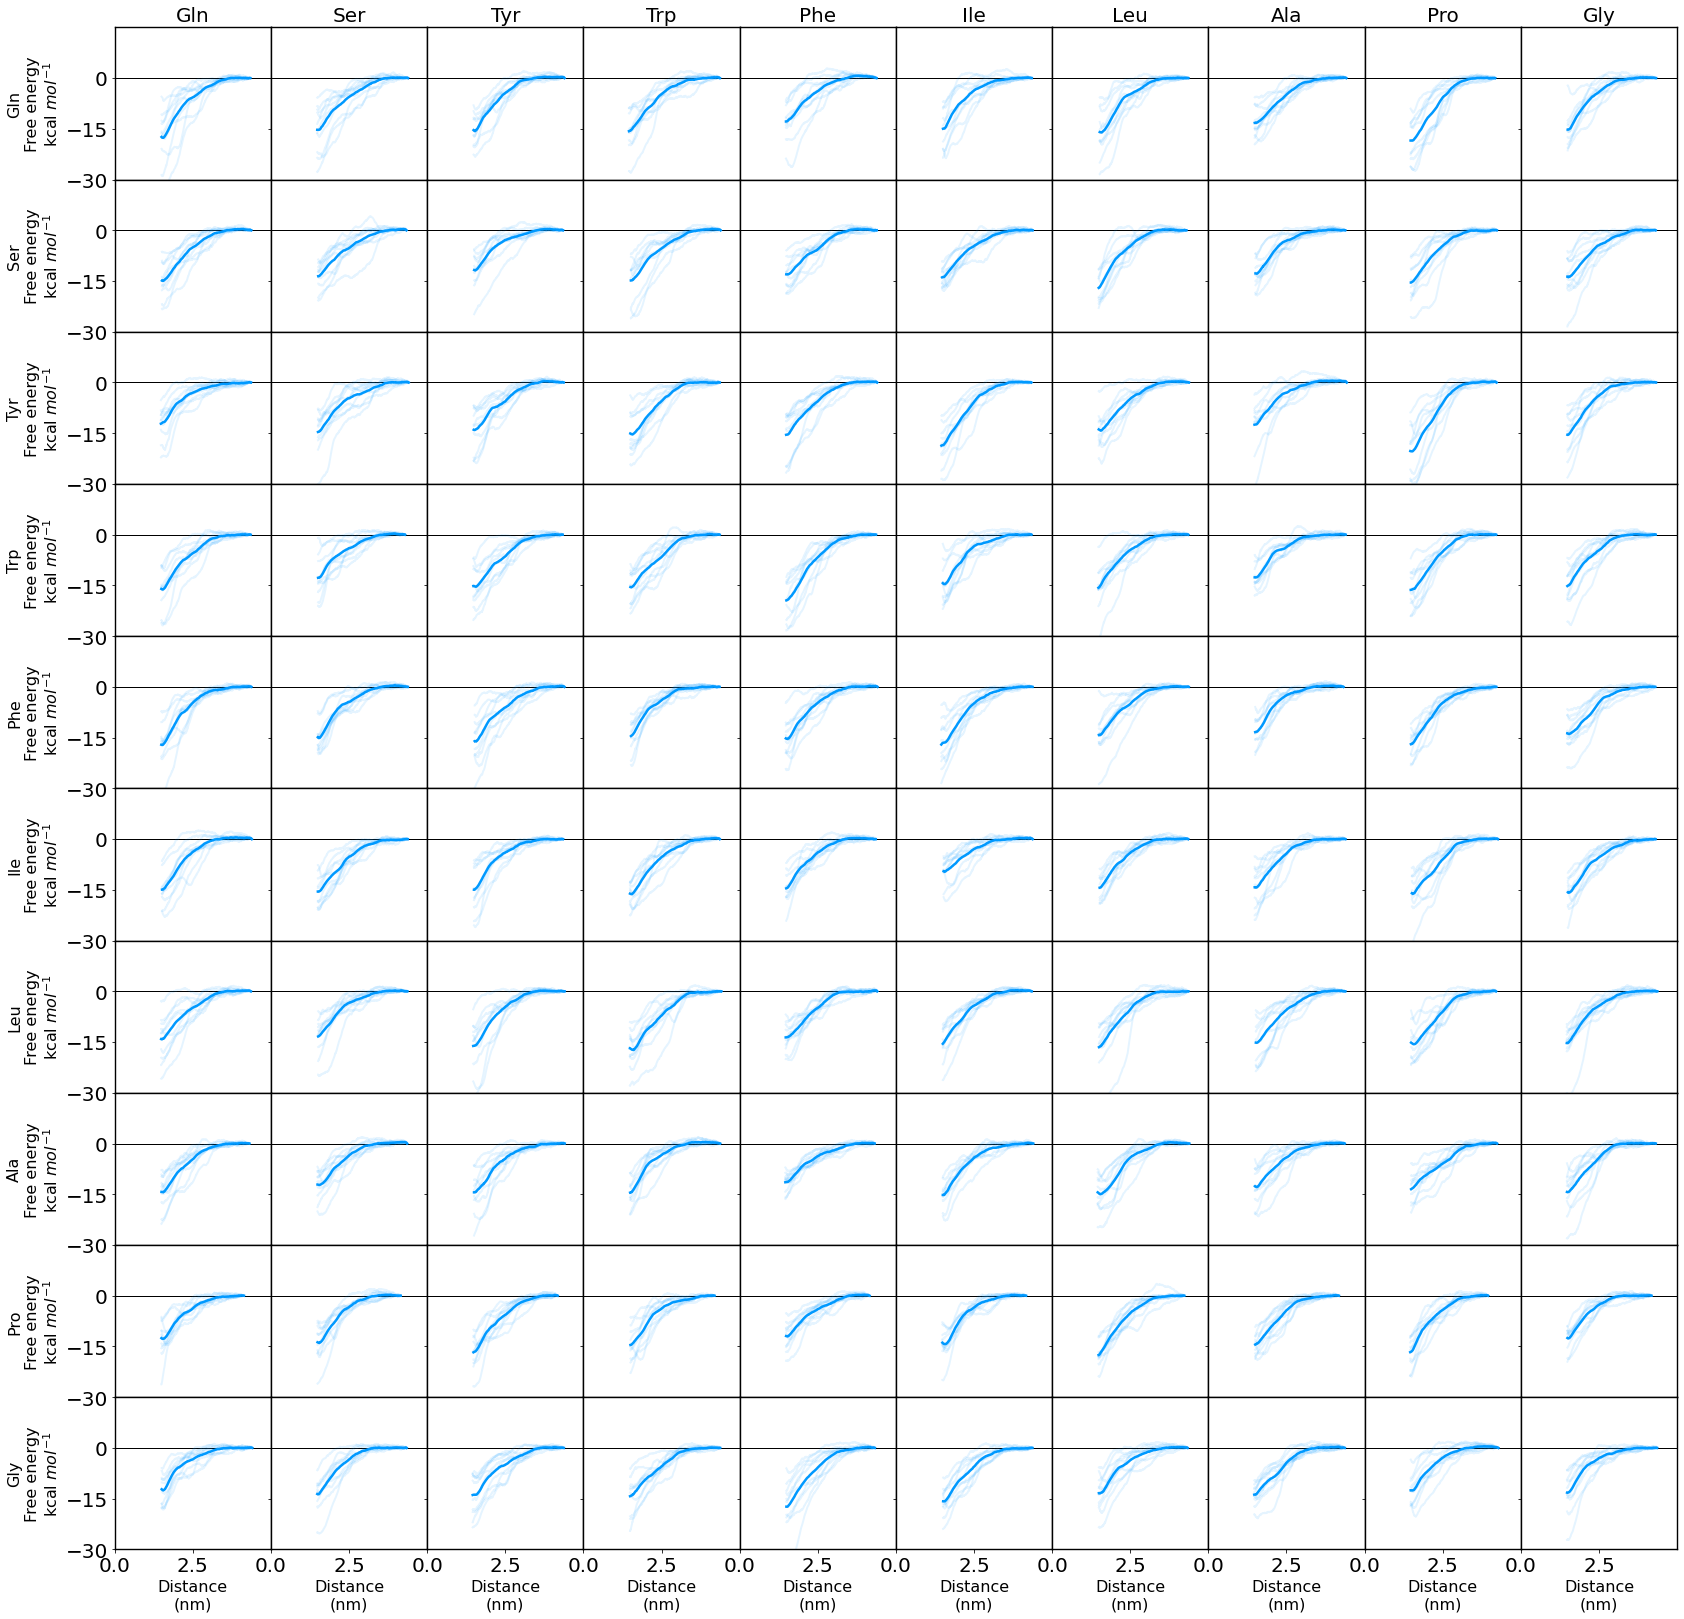

In [9]:
Plot.plot_all_dgs(MT3_PMF)

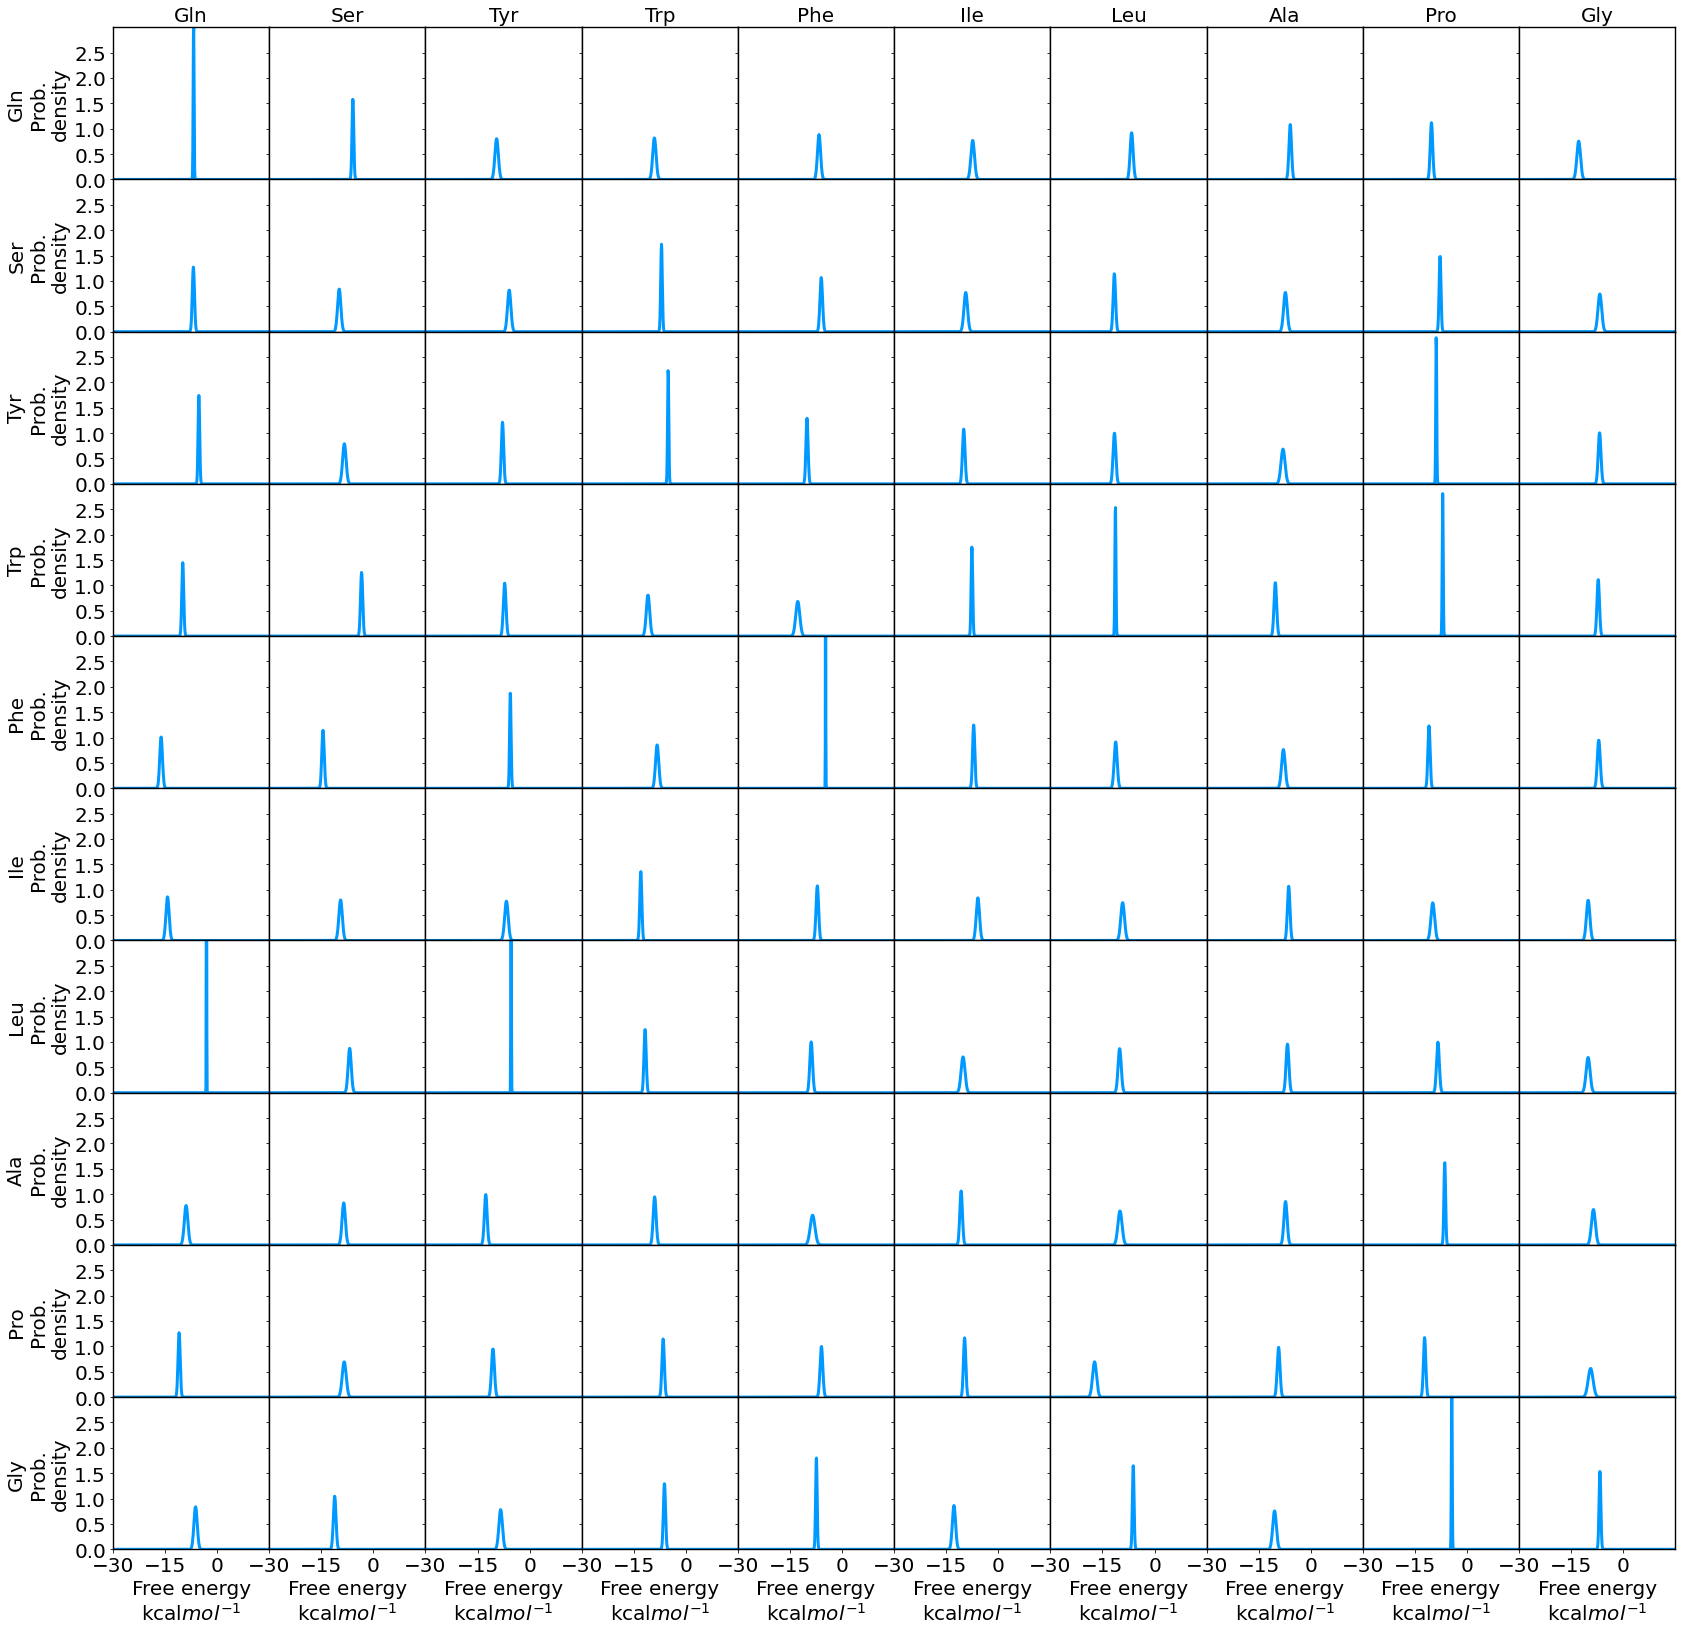

In [10]:
Plot.plot_dg_distributions(MT3_PMF)

In [28]:
reload(Plot)

<module 'Plot' from 'C:\\Users\\sfranco\\Documents\\PhD\\Data\\ThiolScreening\\Library\\S36\\Plot.py'>

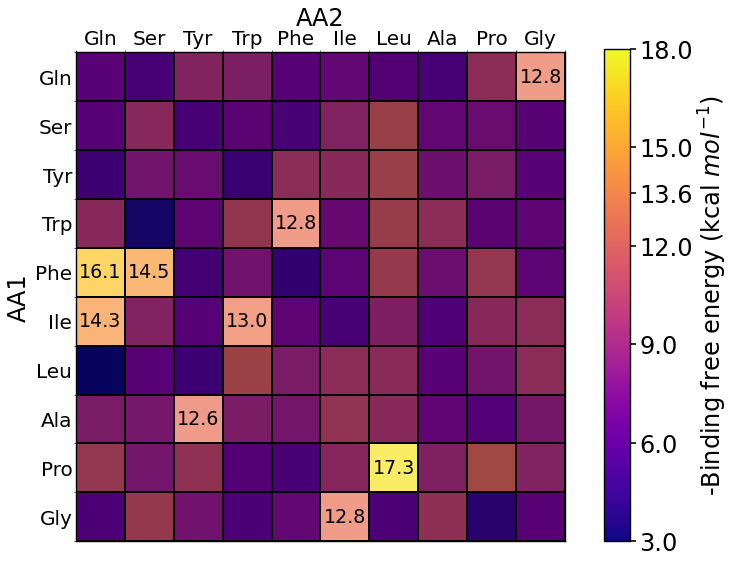

In [29]:
Plot.plot_dg_map(MT3_PMF, show_mean=True, show_std=False, svg=False)
#plot_dg_map(MT3_PMF, show_mean=True, show_std=False)

In [30]:
print(np.sum(MT3_PMF.data.dg_mean<-12.6))

9


GLN -7.070302815564555 -6.608806070634394
SER -7.160327754938313 -6.770926170766923
TYR -8.176613433147729 -7.068369453350037
TRP -8.745793993871297 -7.18619899353746
PHE -8.079061682915093 -7.06738132143552
ILE -9.312273479131619 -6.784606234206898
LEU -8.63623487432358 -6.739756330535987
ALA -8.76536089249499 -8.502907453696876
PRO -9.555219253053153 -8.612788286908874
GLY -7.058675749116425 -6.167144354789288
GLN -7.8836197406237964 -6.343528189723854
SER -8.46304441834545 -7.200854669828277
TYR -7.488691069279698 -6.071461879934555
TRP -8.620421303751824 -6.648943023270379
PHE -7.263603319919069 -6.157541311720918
ILE -9.542113175176704 -7.429877855667425
LEU -10.62259156814707 -9.380431924451363
ALA -7.606970959936423 -6.853059852070543
PRO -8.623966816364234 -7.197778533902556
GLY -7.905465044058789 -6.883089964729341


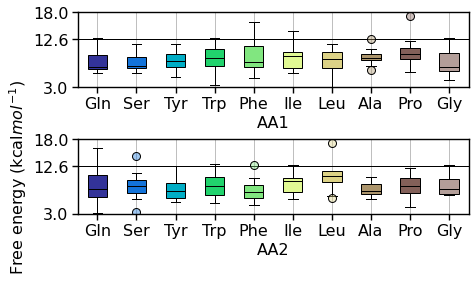

In [31]:
def plot_aa_dependence(cath):
    Z = 16
    colors = cm.terrain(np.linspace(0,0.85,len(AA_ordered)))
    faded_colors = [(*c[:3], 0.8) for c in colors]
    faded_colors = [(*c[:3], 0.4) for c in colors]
    bp = dict(linestyle='-', lw=1, color='k', facecolor='r')
    fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1)
    mp = dict(ls='-', lw=1.,color='k')
    cp = dict(ls='-', lw=1, color='k')
    wp = dict(ls='-', lw=1, color='k')
    
    fig, axs = plt.subplots(figsize=(7,3.7), ncols=1, nrows=2, gridspec_kw={'hspace':0.7})
    plt.ylabel("Free energy (kcal"+r"$mol^{-1}$)", fontsize=Z)
    grouping_col = ['aa1', 'aa2']
    xlabels = ['AA1', 'AA2']
    aa_upper = [aa.upper() for aa in AA_ordered]
    xx = np.linspace(1, len(AA_ordered), len(AA_ordered))
    for ax, g_col, xlab in zip(axs, grouping_col, xlabels):
        ax.axhline(12.6,c='k', lw=1)
        ax.tick_params(labelsize=Z, size=6, width=1.4)
        tmp_df = cath.data.copy()
        #tmp_df.dgs = tmp_df.dgs.apply(list)
        #g_pts = tmp_df.groupby(g_col).agg({'dgs': 'sum'}).dgs.loc[[aa.upper() for aa in AA_ordered]]
        #g_pts = tmp_df.groupby(g_col).dg_mean#.loc[[aa.upper() for aa in AA_ordered]]
        for ama, i, c, fc in zip(aa_upper, xx, colors, faded_colors):
            mask = tmp_df[g_col]==ama
            g_aa = tmp_df.loc[mask,:].dg_mean
            print(ama, np.median(g_aa), np.quantile(g_aa, 0.75))
            bpl = ax.boxplot(-1*g_aa, positions=[i], widths=0.5, patch_artist=True, boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp)
            bpl['boxes'][0].set_facecolor(c)
            bpl['fliers'][0].set_markerfacecolor(fc)
        ax.set_ylim(3,18)
        ax.set_xlim(0.5, len(AA_ordered)+0.5)
        ax.set_xticks(xx)
        ax.set_xticklabels(AA_ordered, fontsize=Z)
        ax.set_yticks([3,12.6,18])
        ax.set_xlabel(xlab, fontsize=Z)
        #ax.set_ylabel("Free energy\n(kcal"+r"$mol^{-1}$)", fontsize=Z)
        ax.grid()
    plt.savefig("Plots/{}/aa_dependence.svg".format(cath.rname), format='svg', bbox_inches='tight')
    svg2emf("Plots/{}/aa_dependence.svg".format(cath.rname))
    plt.savefig("Plots/{}/aa_dependence.png".format(cath.rname), format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
plot_aa_dependence(MT3_PMF)

In [ ]:
Plot.plot_aa_dependence(MT3_PMF)

In [ ]:
MT3_PMF.data

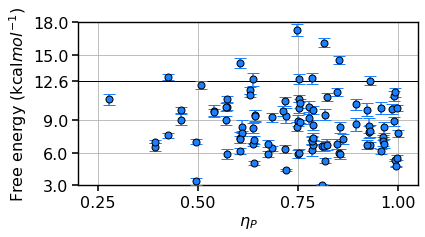

In [33]:
def plot_similarity(cath):
    Z = 16
    
    tmp_df = cath.data.copy()
    aa_upper = [aa.upper() for aa in AA_ordered]
    fig, ax = plt.subplots(figsize=(6.1,3), ncols=1, nrows=1, gridspec_kw={'hspace':0.4})
    ax.axhline(12.6,c='k', lw=1)
    for eta, gs, gm, ge in zip(cath.data.psc, cath.data.dgs, cath.data.dg_mean, cath.data.dg_std):
        #ax.errorbar([eta]*len(gs), gs, fmt='o', color=(0.6,0.9,1.0, 1), mew=0., mec='k', zorder=1, ms=5)
        ax.errorbar([eta], [-1*gm], yerr=[ge], fmt='o', color=(0.1,0.5,1.0, 1), mew=1, mec='k', zorder=200, ms=7, capsize=6)
        
    #colors = cm.terrain(np.linspace(0,0.85,len(AA_ordered)))
    #for ama, c in zip(aa_upper, colors):
        #mask = tmp_df['aa2']==ama
        #entry = tmp_df.loc[mask,:]
        #for i, pt in entry.iterrows():
            #ax.errorbar([pt.psc], [-1*pt.dg_mean], yerr=[pt.dg_std], fmt='o', color=c, mew=1, mec='k', zorder=200, ms=7, capsize=6)
    ax.set_ylim(3,18)
    ax.set_xlim(0.2,1.05)
    ax.set_xticks([0.25,0.5,0.75,1])
    #ax.set_xticklabels(AA_ordered, fontsize=Z)
    ax.set_yticks([3,6,9,12.6,15,18])
    ax.set_xlabel(r"$\eta_P$", fontsize=Z)
    ax.set_ylabel("Free energy (kcal"+r"$mol^{-1}$)", fontsize=Z)
    ax.tick_params(labelsize=Z, size=6, width=1.6)
    ax.grid()
    plt.savefig("Plots/{}/psc.svg".format(cath.rname), format='svg', bbox_inches='tight')
    svg2emf("Plots/{}/psc.svg".format(cath.rname))
    plt.savefig("Plots/{}/psc.png".format(cath.rname), format='png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
plot_similarity(MT3_PMF)

In [34]:
max(MT3_PMF.data.dg_mean)

-3.0542391468667596

In [35]:
toexport = MT3_PMF.data[['aa1','aa2','psc','dg_mean','dg_std']].round(2).sort_values('dg_mean', ascending=True)
toexport.aa1 = toexport.aa1.apply(lambda k: k[0]+k[1:].lower())
toexport.aa2 = toexport.aa2.apply(lambda k: k[0]+k[1:].lower())
AA_lower = [aa[0] + aa[1:].lower() for aa in AA_ordered]
toexport = toexport.loc[toexport.aa1.isin(AA_lower) & toexport.aa2.isin(AA_lower)]
toexport.to_csv("Candidates.csv".format(RNAME), index=False)

In [ ]:
toexport.head(15)

In [ ]:
toexport.tail(15)

In [ ]:
candidates = MT3_PMF.data[MT3_PMF.data.dg_mean <=-9.7]
output_pmf = candidates[['aa1','aa2','psc','dg_mean','dg_std']].round(2).sort_values('dg_mean', ascending=True)
#output_pmf.to_csv("Candidates.csv".format(RNAME), index=False)
#output.style.apply(pp.highlight_charged_aas, axis=1)
output_pmf

In [ ]:
bad_candidates = MT3_PMF.data[MT3_PMF.data.dg_mean]
bad_output_pmf = bad_candidates[['aa1','aa2','psc','dg_mean','dg_std']].round(2).sort_values('dg_mean', ascending=False)
#candidates.to_csv("Candidates/{}.csv".format(RNAME), index=False)
#output.style.apply(pp.highlight_charged_aas, axis=1)
bad_output_pmf

# Weighted Fraction

In [ ]:
MT3_WF = pp.Catecholamine_weighted(RNAME, eta=2.22, th=6)
MT3_WF.data = pp.rank_metric('wf', MT3_WF.data)

In [ ]:
Plot.plot_bound_ligands(MT3_WF)

In [ ]:
reload(Plot)

In [ ]:
Plot.plot_wf_map(MT3_WF, show_mean=True, show_std=False, cath_pmf=MT3_PMF)

In [ ]:
Plot.plot_aa_dependence_wf(MT3_WF)

In [ ]:
candidates = MT3_WF.data[MT3_PMF.data.dg_mean <=-9.09]
#candidates = MT3_WF.data[MT3_WF.data.wf_mean > 0.77]
output_wf = candidates[['aa1','aa2','psc','wf_mean','wf_std']].round(2).sort_values('wf_mean', ascending=False)
#candidates.to_csv("Candidates/{}.csv".format(RNAME), index=False)
#output.style.apply(pp.highlight_charged_aas, axis=1)
output_wf

In [ ]:
bad_candidates = MT3_WF.data[MT3_PMF.data.dg_mean >=-6.72]
#candidates = MT3_WF.data[MT3_WF.data.wf_mean > 0.77]
bad_output_wf = bad_candidates[['aa1','aa2','psc','wf_mean','wf_std']].round(2).sort_values('wf_mean', ascending=True)
#candidates.to_csv("Candidates/{}.csv".format(RNAME), index=False)
#output.style.apply(pp.highlight_charged_aas, axis=1)
bad_output_wf

In [ ]:
output = output_wf.copy().drop('wf_std', axis=1)
output['dg_mean'] = output_pmf.dg_mean.loc[output.index]
output.to_csv('Candidates.csv')

In [ ]:
bad_output = bad_output_wf.copy().drop('wf_std', axis=1)
bad_output['dg_mean'] = bad_output_pmf.dg_mean.loc[bad_output.index]
bad_output.to_csv('Candidates_bad.csv')

In [ ]:
bad_output.sort_values('')

# Together

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xlim((0,1))
ax.set_ylim((0,25))
ax.set_xlabel("Wighted fraction", fontsize=Z)
ax.set_ylabel("-Binding energy (kcal/mol)", fontsize=Z)
ax.tick_params(labelsize=Z)
ax.axvline(0.24, lw=2, zorder=0, c=(0.8,0.5,0.8)) #0.24 is the best for S31-33 Weighted fraction
ax.axhline(9.09, lw=2, zorder=1, c=(0.8,0.5,0.8)) #9.09 is the best for S36 Pulling
for wf, wf_std, dg, dg_std in zip(MT3_WF.data.wf_mean, MT3_WF.data.wf_std, MT3_PMF.data.dg_mean, MT3_PMF.data.dg_std):
    ax.errorbar(wf, -1*dg, xerr=wf_std, yerr=dg_std, fmt='o', ms=9, mec='k', mew=1.5, zorder=50, elinewidth=0.4, ecolor='k', capsize=2, color=(1,0.9,0.8))
plt.show()
plt.close()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xlim(len(MT3_PMF.data),-1)
ax.set_ylim(len(MT3_PMF.data),-1)
ax.set_xlabel("Wighted fraction (Rank)", fontsize=Z)
ax.set_ylabel("-Binding energy (Rank)", fontsize=Z)
ax.tick_params(labelsize=Z)
for wfr, wfr_std_up, wfr_std_down, dgr, dgr_std_up, dgr_std_down in zip(MT3_WF.data.wf_rank, MT3_WF.data.wf_rank_std_up, MT3_WF.data.wf_rank_std_down, MT3_PMF.data.dg_rank, MT3_PMF.data.dg_rank_std_up, MT3_PMF.data.dg_rank_std_down):
    ax.errorbar(wfr, dgr, xerr=[[wfr_std_down], [wfr_std_up]], yerr=[[dgr_std_up], [dgr_std_down]], color=(1,0.9,0.8), fmt='o', ms=9, mec='k', mew=1.5, zorder=50, elinewidth=0.6, ecolor='k', capsize=2)
plt.show()
plt.close()